In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, metrics, regularizers, callbacks

In [2]:
# import the data from where it is available
df = pd.read_csv('/content/drive/MyDrive/CS464_Project/baseline_df.csv')

# preview the data
df.head(9)

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,10797460.0,0.999956,0.999976,0.999927,0.999900,0.999946,0.999974,0.999817,1.000073,0.999805,...,0.999985,1.000216,0.999849,0.999988,0.999935,0.999952,1.000010,1.000180,0.999846,1.0
1,10848459.0,1.000090,NaN,0.999933,1.000010,1.000484,1.000211,0.999942,1.000306,1.000175,...,1.000171,1.000071,1.000015,1.000282,1.000190,0.999994,1.000019,1.000038,1.000262,0.0
2,10797460.0,1.000086,1.000074,0.999959,1.000018,1.000172,0.999981,0.999912,1.000094,1.000037,...,1.000001,0.999999,0.999876,1.000060,0.999987,0.999778,0.999984,1.000067,0.999960,1.0
3,6721123.0,0.999984,1.000008,0.999981,0.999999,0.999918,0.999998,0.999958,0.999988,0.999988,...,1.000084,0.999993,1.000052,1.000010,0.999980,0.999998,1.000053,0.999989,0.999980,0.0
4,10811496.0,1.000903,1.001195,1.000961,1.000900,1.001421,1.001033,1.001075,1.000885,1.001231,...,1.000613,1.000885,1.000414,1.000970,1.000982,1.001035,1.000859,1.000877,1.001111,1.0
5,10419211.0,1.000073,0.999960,0.999838,0.999954,0.999910,1.000209,1.000095,1.000081,1.000063,...,0.999946,1.000153,1.000110,0.999929,1.000128,0.999875,1.000152,1.000048,0.999907,0.0
6,10854555.0,1.000120,0.999931,1.000449,1.000055,1.000293,0.999975,1.000168,0.999731,1.000073,...,0.999826,1.000138,0.999964,0.999707,1.000029,1.000333,1.000016,1.000056,0.999877,1.0
7,10464078.0,0.999899,0.999583,0.999602,1.000081,0.999582,1.000017,1.000010,0.999868,0.999436,...,1.000024,0.999976,0.999459,1.000109,0.999835,1.000150,1.000103,1.000003,1.000137,0.0
8,10872983.0,1.000059,0.999925,0.999920,1.000004,0.999854,1.000130,0.999802,1.000062,1.000080,...,0.999912,0.999898,0.999894,1.000102,1.000097,0.999919,1.000122,1.000041,1.000147,1.0


In [3]:
df_fill = df.fillna(df.mean()) # handle missing values

X = df_fill.drop(columns=['kepid', 'label'])
y = df['label']

X.tail(9)

,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,...,flux_991,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000
3991,1.000384,0.999874,1.000209,0.999835,1.001489,1.000663,0.999104,0.998924,1.000861,1.000150,...,1.000748,0.999829,0.998737,1.000422,1.000447,0.999452,1.000423,1.000519,0.998280,0.999587
3992,1.000008,0.999968,0.999883,0.999932,0.999908,0.999925,0.999907,0.999889,0.999897,0.999909,...,1.000239,1.000116,0.999983,1.000144,1.000109,1.000043,1.000034,1.000095,0.999988,1.000027
3993,1.001316,1.001953,1.003438,1.004554,1.004643,1.004634,1.004852,1.005980,1.005495,1.003788,...,1.001224,1.004544,0.998662,0.999766,0.999669,0.998783,0.998228,0.998725,1.000902,0.998680
3994,1.000005,0.999966,1.000003,0.999997,1.000017,0.999933,1.000031,0.999987,0.999943,1.000025,...,0.999959,1.000020,0.999989,0.999986,0.999956,0.999955,0.999953,1.000028,0.999964,0.999998
3995,0.998747,0.998346,1.000972,0.993875,1.001994,0.993139,1.001183,0.989094,1.006907,0.991038,...,0.994391,1.001793,0.990140,1.002741,0.989490,1.005001,0.990013,1.007279,0.989272,1.000384
3996,1.000020,1.000018,1.000061,0.999953,1.000035,1.000002,1.000043,1.000016,1.000021,0.999982,...,1.000058,1.000033,1.000018,0.999956,1.000034,1.000031,1.000029,0.999980,1.000068,1.000035
3997,1.000444,0.999989,1.000164,1.000698,0.999883,0.999882,1.000409,0.999808,0.999825,1.000181,...,1.000303,1.000378,0.999999,1.000452,1.000298,0.999903,1.000395,1.000193,1.000003,1.000396
3998,0.999978,0.999963,0.999992,0.999961,0.999956,0.999985,0.999988,1.000016,0.999993,1.000013,...,0.999998,1.000022,0.999984,1.000027,1.000030,1.000011,1.000012,0.999953,0.999992,0.999985
3999,0.999927,0.999789,1.000140,0.999850,1.000005,0.999919,1.000126,0.999963,1.000020,0.999899,...,1.000354,0.999825,1.000136,0.999810,1.000091,0.999737,0.999896,0.999679,0.999864,0.999992


In [21]:
# Split the data into train set and test set (80% for training set and 20% for test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [22]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (3200, 1000)
X_test.shape: (800, 1000)


In [34]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model: Convolutional Neural Network (CNN)
Architecture
- 1 1-Dimensional convolutional hidden layer (Conv1D) with 16 filters.
- Kernel_size of 3 and zero-padding 'same', so that the output is the same size as the input and there's not information loss.
- MaxPooling layer with a pool_size of 2 for the convolutional layer.
- 1 fully-connected Dense layer with 32 neurons.
- 1 output layer with 2 neurons
- Activation function 'ReLU' for the hidden layers, 'Sigmoid' for the output layer
- Optimizer: Adam
- Regularization: L2
- Learning Rate: 0.01
- EarlyStopping

In [49]:
def create_model(X_train, activation='relu', learn_rate=0.01):
  model = models.Sequential()
  model.add(layers.Conv1D(filters = 16,
                          input_shape = (X_train.shape[1], 1),
                          kernel_size=(3),
                          activation=activation,
                          kernel_regularizer='l2',
                          padding='same'))
  model.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation=activation, kernel_regularizer='l2'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'))

  optimizer = optimizers.Adam(learning_rate=learn_rate)

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model

### Training & Prediction

In [50]:
EPOCHS = 50
VAL_SPLIT = 0.2
BATCH_SIZE = 75
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [51]:
model = create_model(X_train)

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 1000, 16)          64        
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 500, 16)           0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 500, 16)           0         
                                                                 
 flatten_7 (Flatten)         (None, 8000)              0         
                                                                 
 dense_13 (Dense)            (None, 32)                256032    
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                      

In [52]:
# training
model_history = model.fit(X_train_scaled, y_train, validation_split=VAL_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, callbacks=[early_stop])

Epoch 1/50
35/35 [==============================] - 2s 44ms/step - loss: 0.9342 - accuracy: 0.6895 - val_loss: 0.7211 - val_accuracy: 0.7281
Epoch 2/50
35/35 [==============================] - 1s 37ms/step - loss: 0.6867 - accuracy: 0.6934 - val_loss: 0.6966 - val_accuracy: 0.7375
Epoch 3/50
35/35 [==============================] - 1s 36ms/step - loss: 0.6713 - accuracy: 0.6906 - val_loss: 0.7236 - val_accuracy: 0.7203
Epoch 4/50
35/35 [==============================] - 1s 36ms/step - loss: 0.6594 - accuracy: 0.6898 - val_loss: 0.6680 - val_accuracy: 0.7203
Epoch 5/50
35/35 [==============================] - 1s 38ms/step - loss: 0.6570 - accuracy: 0.6977 - val_loss: 0.6575 - val_accuracy: 0.7250
Epoch 6/50
35/35 [==============================] - 2s 56ms/step - loss: 0.6535 - accuracy: 0.7004 - val_loss: 0.6526 - val_accuracy: 0.7359
Epoch 7/50
35/35 [==============================] - 2s 59ms/step - loss: 0.6382 - accuracy: 0.7016 - val_loss: 0.6396 - val_accuracy: 0.7203
Epoch 8/50
35

25/25 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.44      0.61       405
         1.0       0.63      0.98      0.77       395

    accuracy                           0.71       800
   macro avg       0.80      0.71      0.69       800
weighted avg       0.80      0.71      0.69       800

Confusion matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

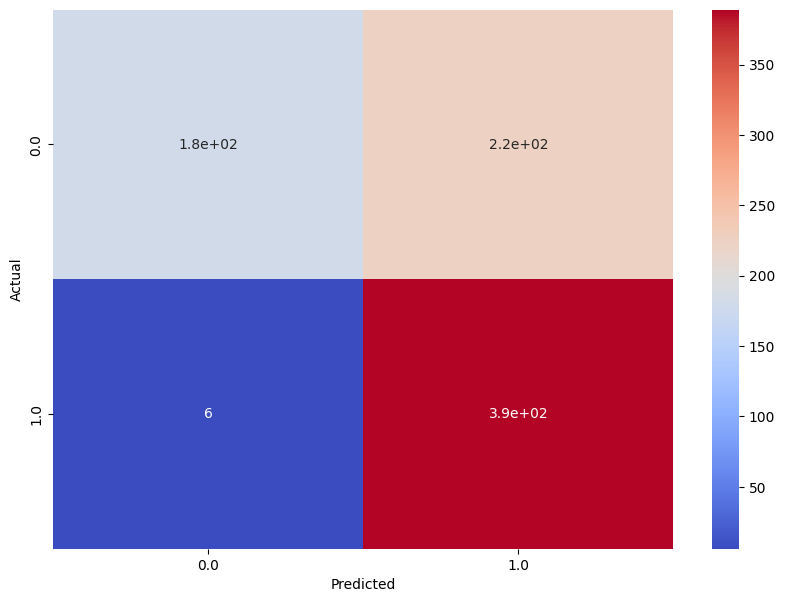

In [58]:
# prediction
y_pred = np.round(model.predict(np.array(X_test_scaled)))

# confusion matrix and classification_report
print(classification_report(y_test, y_pred))

print("Confusion matrix")
matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)


### Observations